In [33]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import math
pi = math.pi

In [46]:
sound1, FS1 = librosa.load('data/fold1/7383-3-0-0.wav')
wind = 2**11 # in samples
step = 2**9 # in samples
rayleigh = FS1/wind
nyquist = FS1/2
step_sec = step/FS1 # in sec

freqs = [rayleigh*(i+1) for i in range(round(wind/2))]
assert(freqs[-1]==nyquist)

ft1 = librosa.stft(sound1,window=scipy.signal.boxcar, n_fft=wind, hop_length=step)
ft1 = ft1[1:] # remove DC comp
psd1 = abs(ft1)**2
db1 = librosa.power_to_db(psd1)
# next get phase angle and shift

1024
11025.0
11025.0


In [55]:
phf = np.angle(ft1); # uncorrected phases
cphf = [[((pi + (phf[f][s]-2*pi*s*step_sec*freqs[f])) % 2*pi) - pi for s in range(len(ft1[0]))] for f in range(len(ft1))] # corrected phases

phdiff = [np.diff(cphf[f]) for f in range(len(ft1))] # phase diff over time as func of freq
cphdiff = [[pi-abs(abs(phdiff[f][s])-pi) for s in range(len(phdiff[0]))] for f in range(len(phdiff))]  # wrap so 2pi is like 0, pi farthest
        #     phdiff = diff(cphf,1,2); % phase differences over time
        #     cphdiff = pi-abs(abs(phdiff)-pi); % make pi farthest, 2pi like zero
        #     cphdiff = cphdiff(:,~isnan(cphdiff(1,:)));

IndexError: index 172 is out of bounds for axis 0 with size 172

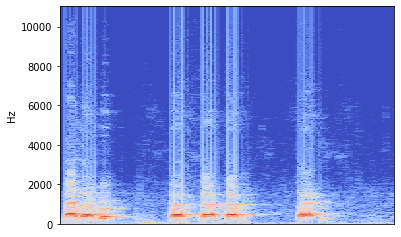

In [3]:
librosa.display.specshow(db1, y_axis='linear')

In [54]:
print(len(ft1))
print(len(ft1[0]))
print(abs(-1))

1024
173
1


In [16]:
np.angle([[1, -1],[1j, -1j]])

array([[ 0.        ,  3.14159265],
       [ 1.57079633, -1.57079633]])